![image.png](https://i.ytimg.com/vi/d7HbAdp0_HY/maxresdefault.jpg)

# **Predicting Used Caprice Prices**

This is a regression model to predict the **price** of used caprices based on features found.


---

#  **Dataset**
https://www.kaggle.com/datasets/shockinlemon/caprice-dataset

Caprice
 used car listings dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [60]:
import kagglehub

# Download version 2 from Kaggle
path = kagglehub.dataset_download("shockinlemon/caprice-dataset/versions/2")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'caprice-dataset' dataset.
Path to dataset files: /kaggle/input/caprice-dataset


In [61]:
# Load the dataset
caprice_path = os.path.join(path, 'Caprice_Dataset.csv')
df_caprice = pd.read_csv(caprice_path)

print(f"Dataset shape: {df_caprice.shape}")
df_caprice.head()

Dataset shape: (65, 10)


,Url,Model,Odometer_km_k,Body_Parts_Painted,Trim,Color,Price_SAR_k,Lifters_Changed,Unnamed: 8,Unnamed: 9
0,https://haraj.com.sa/11154313618/%D9%83%D8%A7%...,2015.0,245.0,0.0,LS,White,62.0,Yes,NaN,NaN
1,https://haraj.com.sa/11151566438/%D9%83%D8%A7%...,2014.0,203.0,0.0,LS,White,65.0,No,NaN,NaN
2,https://haraj.com.sa/11152849305/%D9%83%D8%A7%...,2015.0,216.0,0.0,LS,Grey,65.0,Yes,NaN,NaN
3,https://haraj.com.sa/11152080071/%D9%83%D8%A7%...,2016.0,227.0,0.0,LS,Zaatar,68.0,Yes,NaN,NaN
4,https://haraj.com.sa/11154166738/%D9%83%D8%A7%...,2016.0,230.0,0.0,LS,Black,68.0,Yes,NaN,NaN


In [62]:
# Check data types and structure
df_caprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Url                 64 non-null     object 
 1   Model               64 non-null     float64
 2   Odometer_km_k       64 non-null     float64
 3   Body_Parts_Painted  60 non-null     float64
 4   Trim                64 non-null     object 
 5   Color               64 non-null     object 
 6   Price_SAR_k         57 non-null     float64
 7   Lifters_Changed     64 non-null     object 
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          1 non-null      object 
dtypes: float64(5), object(5)
memory usage: 5.2+ KB


**Check for Missing Values**

In [63]:
# Analyze missing values
missing_percentage = (df_caprice.isnull().sum() / len(df_caprice)) * 100
missing_data = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing_Percentage': missing_percentage.values
})
missing_data = missing_data[missing_data['Missing_Percentage'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing Data Analysis:")
missing_data.head(10)

Missing Data Analysis:


,Column,Missing_Percentage
8,Unnamed: 8,100.000000
9,Unnamed: 9,98.461538
6,Price_SAR_k,12.307692
3,Body_Parts_Painted,7.692308
1,Model,1.538462
0,Url,1.538462
5,Color,1.538462
4,Trim,1.538462
2,Odometer_km_k,1.538462
7,Lifters_Changed,1.538462


In [64]:
# Descriptive statistics for numerical columns
df_caprice.describe()

,Model,Odometer_km_k,Body_Parts_Painted,Price_SAR_k,Unnamed: 8
count,64.000000,64.000000,60.000000,57.000000,0.0
mean,2014.406250,222.687500,1.835000,60.254386,NaN
std,1.399759,36.263093,1.763454,12.050164,NaN
min,2012.000000,155.000000,0.000000,33.500000,NaN
25%,2013.000000,198.750000,0.000000,52.000000,NaN
50%,2015.000000,221.000000,2.000000,62.000000,NaN
75%,2016.000000,242.750000,3.000000,68.000000,NaN
max,2016.000000,302.000000,7.000000,92.000000,NaN


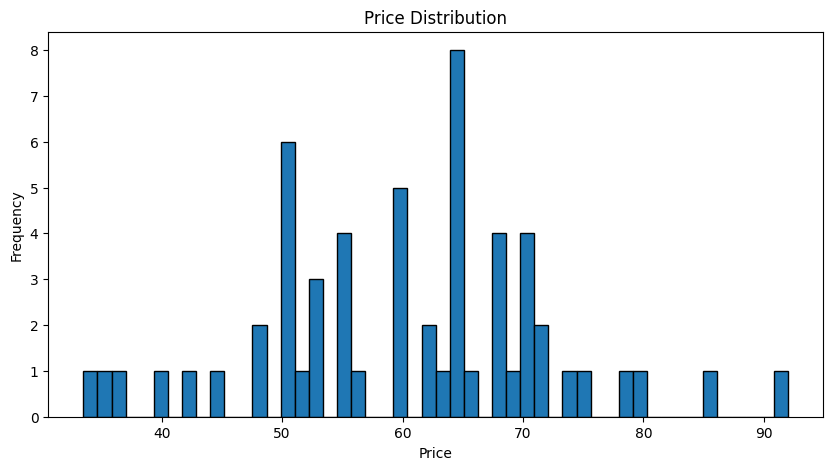

In [65]:
# Price distribution (target variable)
plt.figure(figsize=(10, 5))
plt.hist(df_caprice['Price_SAR_k'].dropna(), bins=50
         , edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

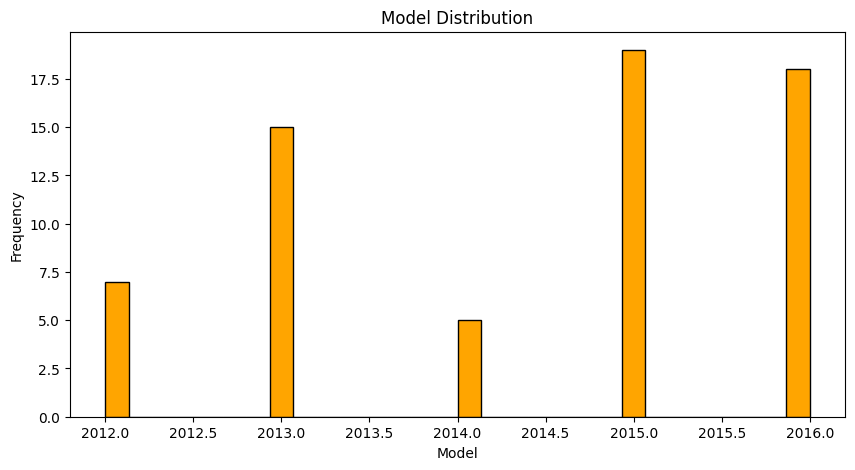

In [66]:
# Model distribution
model_counts = df_caprice['Model'].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(df_caprice['Model'].dropna(), bins=30, edgecolor='black', color='orange')
plt.title('Model Distribution')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.show()

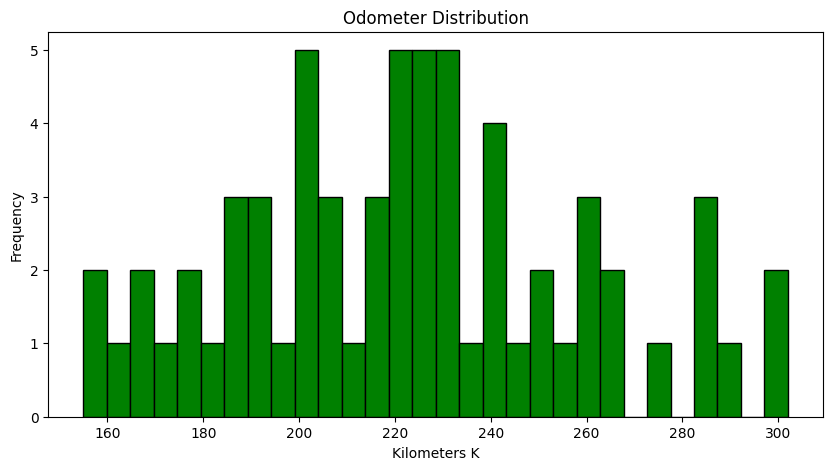

In [67]:
# Odometer distribution
model_counts = df_caprice['Odometer_km_k'].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(df_caprice['Odometer_km_k'].dropna(), bins=30, edgecolor='black', color='green')
plt.title('Odometer Distribution')
plt.xlabel('Kilometers K')
plt.ylabel('Frequency')
plt.show()

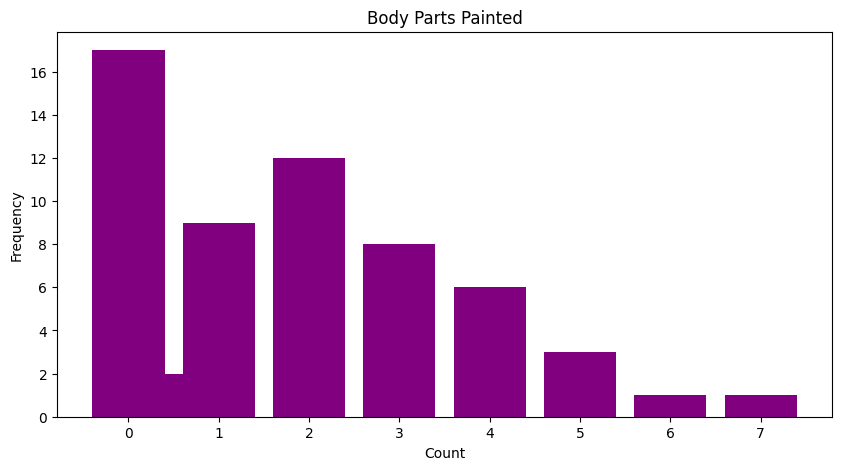

In [68]:
# Body_Parts_Painted distribution
Body_Parts_Painted_count = df_caprice['Body_Parts_Painted'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(Body_Parts_Painted_count.index, Body_Parts_Painted_count.values, color='purple')
plt.title('Body Parts Painted')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

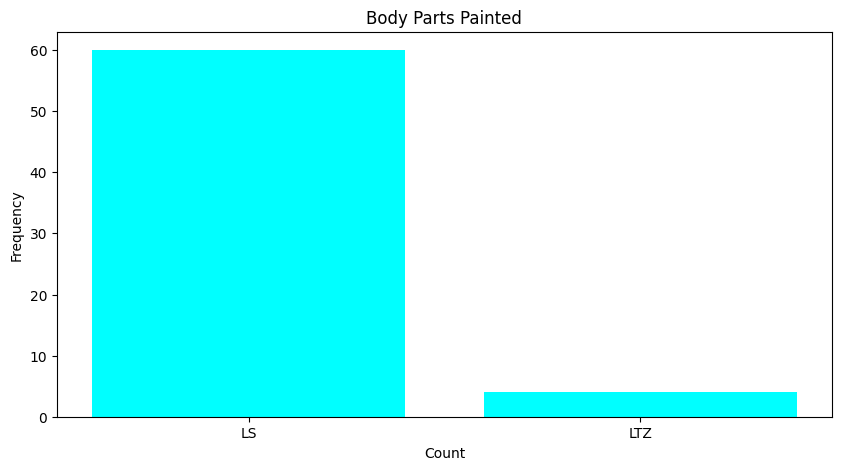

In [69]:
# Trim distribution
trim_count = df_caprice['Trim'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(trim_count.index, trim_count.values, color='cyan')
plt.title('Body Parts Painted')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

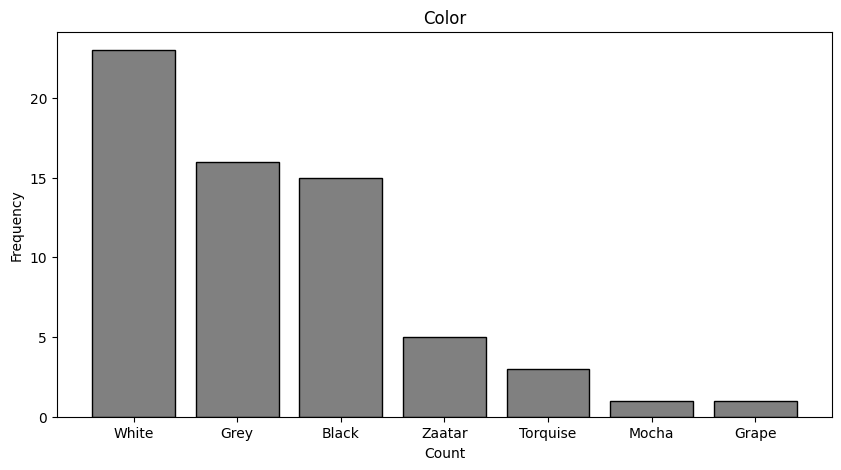

In [70]:
# Color distribution
color_count = df_caprice['Color'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(color_count.index, color_count.values, edgecolor='black', color='grey')
plt.title('Color')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

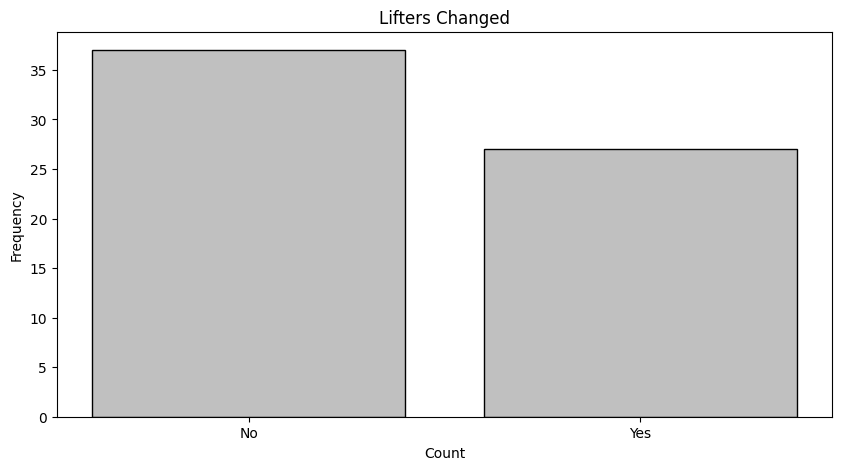

In [71]:
# Lifters-Changed distribution
lifters_count = df_caprice['Lifters_Changed'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(lifters_count.index, lifters_count.values, edgecolor='black', color='silver')
plt.title('Lifters Changed')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [72]:
# Select relevant columns
cols = ['Model', 'Odometer_km_k', 'Body_Parts_Painted', 'Trim', 'Color', 'Price_SAR_k', 'Lifters_Changed']
df_clean = df_caprice[cols].copy()

# Drop rows where key features are missing - can't predict without them
print(f"Before: {df_clean.shape}")
df_clean = df_clean.dropna(subset=['Price_SAR_k', 'Model', 'Odometer_km_k',])
print(f"After dropping missing price/model/odometer: {df_clean.shape}")

Before: (65, 7)
After dropping missing price/model/odometer: (57, 7)


In [73]:
# Fill categorical columns with 'unknown'
for col in ['Color', 'Trim', 'Lifters_Changed']:
    df_clean[col] = df_clean[col].fillna('unknown')

# Fill with mode - discrete feature, mode is most representative
df_clean['Body_Parts_Painted'] = df_clean['Body_Parts_Painted'].fillna(df_clean['Body_Parts_Painted'].mode()[0])

print("Missing values remaining:", df_clean.isnull().sum().sum())

Missing values remaining: 0


In [74]:
# Encode categorical columns - converts text to integers

categorical_cols = ['Trim', 'Color', 'Lifters_Changed']
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

df_clean.head()

,Model,Odometer_km_k,Body_Parts_Painted,Trim,Color,Price_SAR_k,Lifters_Changed
0,2015.0,245.0,0.0,0,5,62.0,1
1,2014.0,203.0,0.0,0,5,65.0,0
2,2015.0,216.0,0.0,0,2,65.0,1
3,2016.0,227.0,0.0,0,6,68.0,1
4,2016.0,230.0,0.0,0,0,68.0,1


In [75]:
# Car age: older cars typically worth less
df_clean['age'] = 2026 - df_clean['Model']

# km per year: high usage = more wear
df_clean['km_per_year'] = (df_clean['Odometer_km_k']*1000) / (df_clean['age'])


# Interaction: captures combined effect of age and annual km
df_clean['age_x_km_per_year'] = df_clean['km_per_year'] * df_clean['age']

# Quick preview of engineered features
df_clean[['Model', 'age', 'Odometer_km_k', 'km_per_year', 'age_x_km_per_year']].head()

,Model,age,Odometer_km_k,km_per_year,age_x_km_per_year
0,2015.0,11.0,245.0,22272.727273,245000.0
1,2014.0,12.0,203.0,16916.666667,203000.0
2,2015.0,11.0,216.0,19636.363636,216000.0
3,2016.0,10.0,227.0,22700.000000,227000.0
4,2016.0,10.0,230.0,23000.000000,230000.0


In [76]:
# Define features (X) and target (y)
feature_cols = ['Model', 'Odometer_km_k', 'age', 'km_per_year',
                'Body_Parts_Painted', 'Trim', 'Color', 'Lifters_Changed',
             'age_x_km_per_year']
X = df_clean[feature_cols]
y = df_clean['Price_SAR_k']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (45, 9), Test: (12, 9)


In [77]:
print(f"\nFeature ranges - Min: {X_train.min().min():.2f}, Max: {X_train.max().max():.2f}")
X_train.head(3)


Feature ranges - Min: 0.00, Max: 302000.00


,Model,Odometer_km_k,age,km_per_year,Body_Parts_Painted,Trim,Color,Lifters_Changed,age_x_km_per_year
45,2013.0,286.0,13.0,22000.000000,4.0,0,5,0,286000.0
27,2015.0,260.0,11.0,23636.363636,2.0,0,5,0,260000.0
8,2014.0,220.0,12.0,18333.333333,0.0,1,5,0,220000.0


In [78]:
# Scale features - fit on train, transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaled ranges - Min: {X_train_scaled.min():.2f}, Max: {X_train_scaled.max():.2f}")
pd.DataFrame(X_train_scaled, columns=X_train.columns).head(3)



Scaled ranges - Min: -1.95, Max: 4.64


,Model,Odometer_km_k,age,km_per_year,Body_Parts_Painted,Trim,Color,Lifters_Changed,age_x_km_per_year
0,-1.136410,1.627030,1.136410,0.588681,1.263494,-0.215666,0.83483,-0.779194,1.627030
1,0.390111,0.925879,-0.390111,1.029971,0.179467,-0.215666,0.83483,-0.779194,0.925879
2,-0.373149,-0.152815,0.373149,-0.400135,-0.904561,4.636809,0.83483,-0.779194,-0.152815


---

# Training the Model

In [79]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
print("Model trained!")

Model trained!


---

# Evaluating the Model

In [80]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE:  SAR {mae:,.2f}")
print(f"RMSE: SAR {rmse:,.2f}")

MAE:  SAR 7.64
RMSE: SAR 9.01


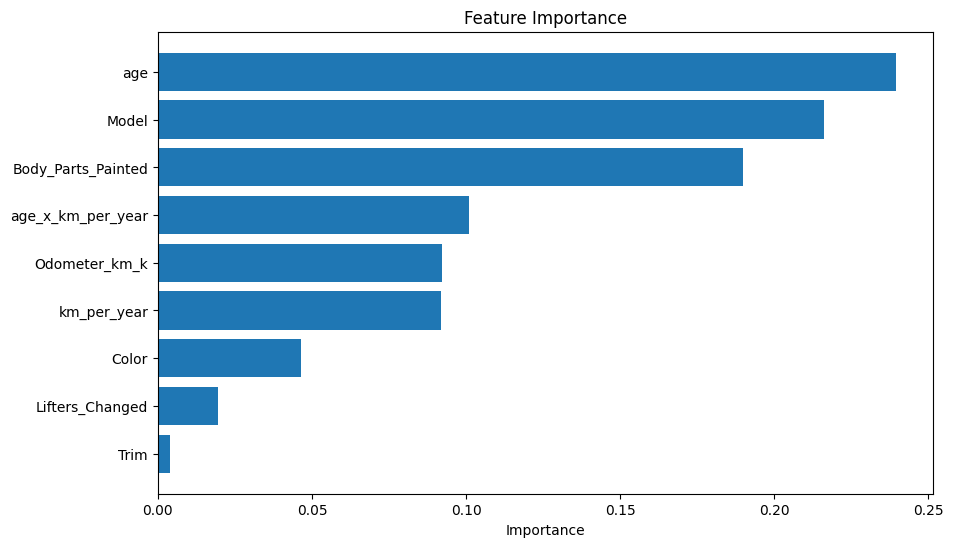

In [81]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

K-Fold splits the data into k equal folds for robust performance estimation.

In [82]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
rmse_scores = []

for train_idx, val_idx in kfold.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train and predict
    model.fit(X_fold_train, y_fold_train)
    y_fold_pred = model.predict(X_fold_val)

    # Calculate metrics
    mae_scores.append(mean_absolute_error(y_fold_val, y_fold_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_fold_val, y_fold_pred)))

mae_scores = np.array(mae_scores)
rmse_scores = np.array(rmse_scores)

print(f"5-Fold CV Results:")
print(f"MAE:  ${mae_scores.mean():,.2f}")
print(f"RMSE: ${rmse_scores.mean():,.2f}")

5-Fold CV Results:
MAE:  $7.59
RMSE: $8.93




### by: shockinlemon
### credits to KAUST Academy AI Specialization Course

